In [2]:
!pip install pygame

In [3]:
!pip install midiutil

In [4]:
!pip install pretty_midi

In [1]:
import sonify

pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
!wget https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
!wget https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz

--2021-07-08 10:42:34--  https://zenodo.org/record/2539456/files/plasticc_train_metadata.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 370350 (362K) [application/octet-stream]
Saving to: 'plasticc_train_metadata.csv.gz'

plasticc_train_meta 100%[===================>] 361.67K   205KB/s    in 1.8s    

2021-07-08 10:42:37 (205 KB/s) - 'plasticc_train_metadata.csv.gz' saved [370350/370350]

--2021-07-08 10:42:37--  https://zenodo.org/record/2539456/files/plasticc_train_lightcurves.csv.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21553100 (21M) [application/octet-stream]
Saving to: 'plasticc_train_lightcurves.csv.gz'

plasticc_train_ligh 100%[===================>]  20.55M  9.78MB/s    in 2.1s    

2021-07-08 10:42:40 (9.7

In [10]:
!mkdir data

In [11]:
!mv plasticc* data

In [8]:
ls data

plasticc_train_lightcurves.csv.gz  plasticc_train_metadata.csv.gz


In [3]:
data = pd.read_csv("data/plasticc_train_lightcurves.csv.gz") #43018203

In [4]:
objData = data["object_id"].isin([43018203])
obj = data[objData]
time = obj["mjd"]
flux = obj["flux"]
obj

,object_id,mjd,passband,flux,flux_err,detected_bool
931466,43018203,59716.3981,5,9.031878,40.635723,0
931467,43018203,59722.3836,4,16.759033,9.524618,0
931468,43018203,59724.4273,4,-0.819979,7.313416,0
931469,43018203,59729.2829,3,0.943308,4.089046,0
931470,43018203,59749.2689,4,-15.890773,6.238988,0
...,...,...,...,...,...,...
931585,43018203,60561.0642,2,1.340015,2.305303,0
931586,43018203,60571.1442,5,-18.777193,18.502325,0
931587,43018203,60582.0143,0,6.969879,7.944149,0
931588,43018203,60590.0354,2,-1.743504,2.042128,0


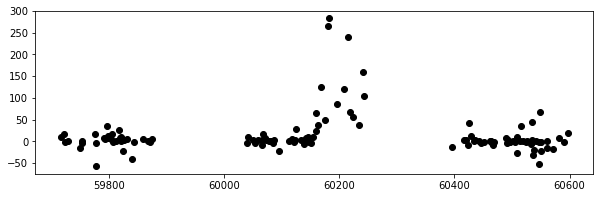

In [5]:
plt.figure(figsize=(10, 3))
plt.plot(time, flux, 'o', color = "black")


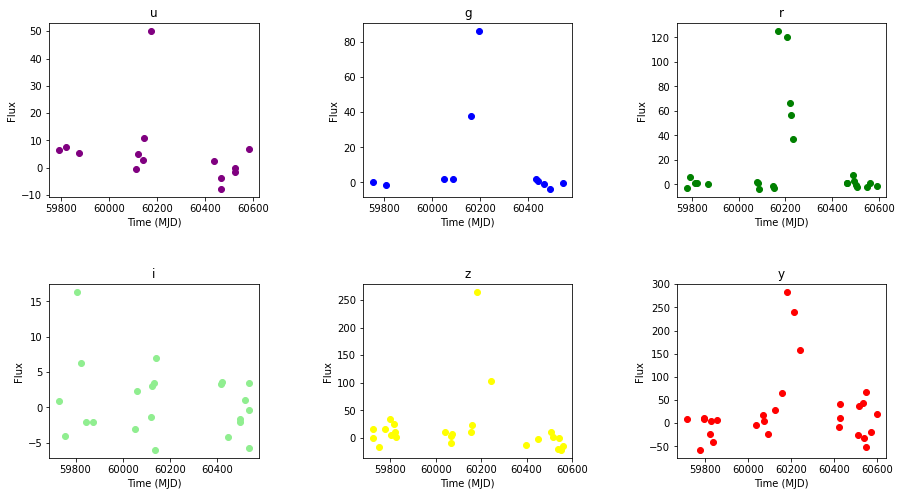

In [11]:
f, ax = plt.subplots(2,3, figsize=(15,8))
f.subplots_adjust(wspace=0.5)
f.subplots_adjust(hspace=0.5)
ax = ax.flatten()
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
ugrizy = ["u","g","r","i","z","y"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    ax[i].set_xlabel("Time (MJD)")
    ax[i].set_ylabel("Flux")
    ax[i].set_title(ugrizy[i])
    ax[i].scatter(timeP, fluxP, color = ugrizyC[i])
   


Text(0, 0.5, 'Flux')

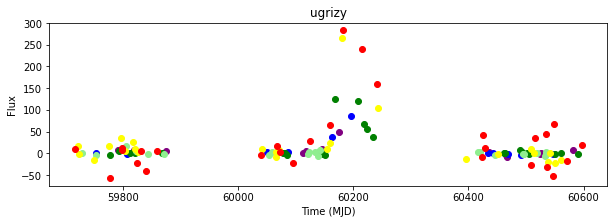

In [18]:
plt.figure(figsize=(10, 3))
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])
plt.title("ugrizy")
plt.xlabel("Time (MJD)")
plt.ylabel("Flux")

In [27]:
x_points = time
y_points = flux
low_note=20
high_note=100
normalized_x = sonify.core.scale_list_to_range(x_points, new_min=0, new_max=30)
normalized_y = sonify.core.scale_list_to_range(y_points, new_min=low_note, new_max=high_note)
        
normed_data = list(zip(normalized_x, normalized_y))


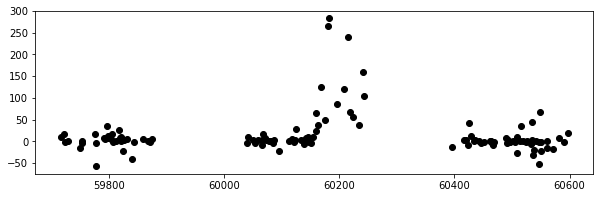

In [28]:
plt.figure(figsize=(10, 3))
plt.plot(time, flux, 'o', color = "black")

In [29]:
sonify.play_midi_from_data(normed_data)

Done playing!


In [30]:
############################################### now for multitrack

In [34]:
points = []
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    
    scaled_x = sonify.scale_list_to_range(timeP, new_min=0, new_max=30)
    scaled_y = sonify.scale_list_to_range(fluxP, new_min=0, new_max=30)
    quantized_x = sonify.quantize_x_value(scaled_x)
    points.append(list(zip(quantized_x, scaled_y)))
multitrack_data = points

In [38]:
instruments_to_add = [
    'steel drums', 'rock organ', 'pizzicato strings', 'oboe', 'ocarina','violin'
]

multitrack_data_with_instruments = []
for index, track in enumerate(multitrack_data):
    multitrack_data_with_instruments.append([instruments_to_add[index]] + track)

Text(0, 0.5, 'Flux')

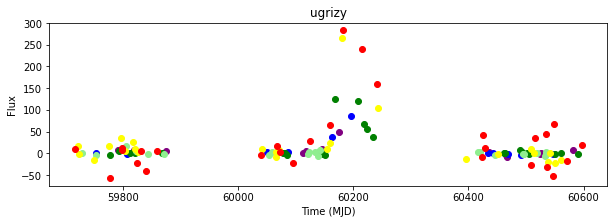

In [39]:
plt.figure(figsize=(10, 3))
ugrizyC = ["purple", "blue", "green", "lightgreen", "yellow", "red"]
for i in range(6):
    objPfilt = obj["passband"].isin([i])
    objP = obj[objPfilt]
    timeP = objP["mjd"]
    fluxP = objP["flux"]
    plt.plot(timeP,fluxP, 'o', color = ugrizyC[i])
plt.title("ugrizy")
plt.xlabel("Time (MJD)")
plt.ylabel("Flux")

In [40]:
sonify.play_midi_from_data(multitrack_data_with_instruments, track_type='multiple', key='c_major')

Done playing!
